
#  Predict Heart Disease in a patient

This dataset was taken from Kaggle. Link: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci/data?select=heart_cleveland_upload.csv.

The "target" field refers to the presence of heart disease in the patient.   
It is integer valued from 0 (no presence) to 1.   

Features Information:

1- age

2- sex (1 = male, 0 = female)

3- cp : chest pain type (4 values)

4- trestbps: resting blood pressure 

5- chol: serum cholestoral in mg/dl   

6- fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7- restecg: resting electrocardiographic results (values 0,1,2)

-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8- thalach: maximum heart rate achieved

9- exang: exercise induced angina

10- oldpeak: ST depression induced by exercise relative to rest

11- slope: the slope of the peak exercise ST segment

12- ca: number of major vessels (0-3) colored by flourosopy

13- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
(thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect))

14- condition:  0 = no disease, 1 = disease

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

In [49]:
df = pd.read_csv("src/heart_cleveland_upload.csv")

In [50]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [51]:
# Is the target variable imbalanced/balanced?
df.condition.value_counts()

0    160
1    137
Name: condition, dtype: int64

In [52]:
# check if target feature has missing value
df['condition'].isnull().any()

False

In [53]:
# thal's values are inconsistent with the description!
df['thal'].value_counts()

0    164
2    115
1     18
Name: thal, dtype: int64

In [54]:
df.cp.value_counts()

3    142
2     83
1     49
0     23
Name: cp, dtype: int64

In [55]:
# Drop ['thal','cp','slope'] columns?
#df.drop(['thal'], axis=1, inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [57]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


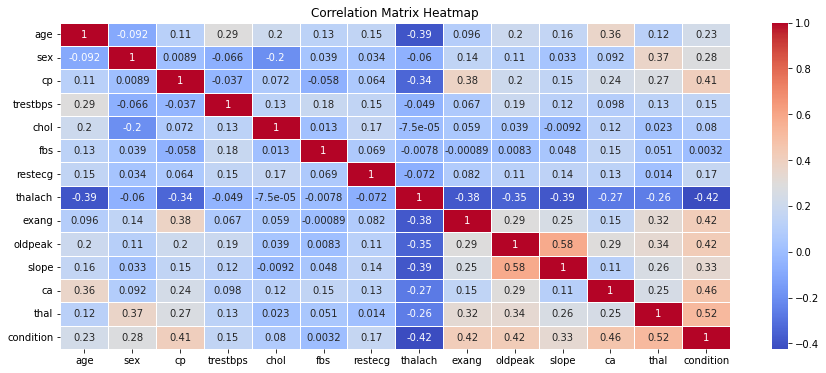

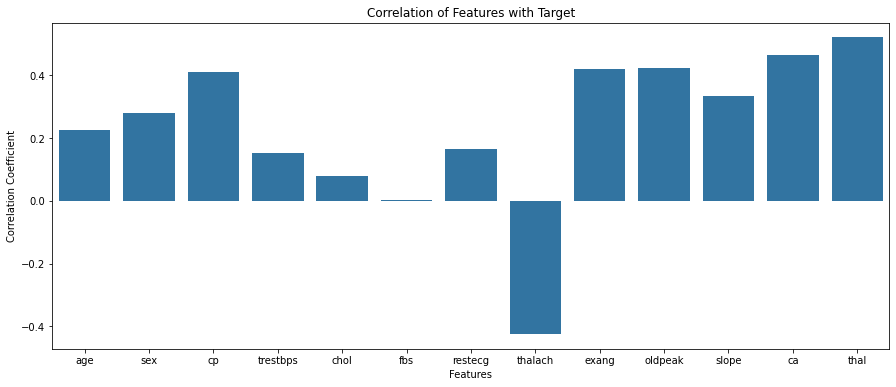

In [58]:
correlation_matrix = df.corr()

# Using a heatmap to visualise
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.7)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Extract correlations with the target column which is 'condition'
target_corr = correlation_matrix['condition'].drop('condition')
plt.figure(figsize=(15, 6))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.title('Correlation of Features with Target')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

Positive correlations with target variable: ca, cp, exang, oldpeak, slope, sex, age  
Negative correlations with target variable: thalac

In [59]:
df.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [60]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Calculate linear fits
m_chol, b_chol = np.polyfit(df['age'], df['chol'], 1)
m_trestbps, b_trestbps = np.polyfit(df['age'], df['trestbps'], 1)

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Age vs Cholesterol", "Age vs Resting Blood Pressure"))

# Add scatter and line for Age vs Cholesterol
fig.add_trace(
    go.Scatter(x=df['age'], y=df['chol'], mode='markers', name='Cholesterol'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df['age'], y=m_chol*df['age'] + b_chol, mode='lines', name='Fit Line', line=dict(color='red')),
    row=1, col=1
)

# Add scatter and line for Age vs Resting Blood Pressure
fig.add_trace(
    go.Scatter(x=df['age'], y=df['trestbps'], mode='markers', name='Resting BP'),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=df['age'], y=m_trestbps*df['age'] + b_trestbps, mode='lines', name='Fit Line', line=dict(color='red')),
    row=1, col=2
)

# Standardize y-axes
y_min = min(df['chol'].min(), df['trestbps'].min())
y_max = max(df['chol'].max(), df['trestbps'].max())
fig.update_yaxes(range=[y_min, y_max], row=1, col=1)
fig.update_yaxes(range=[y_min, y_max], row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Scatter Plots with Linear Fits",
    showlegend=False,
    height=600,
    width=1200
)

# Update x and y axis titles
fig.update_xaxes(title_text="Age", row=1, col=1)
fig.update_yaxes(title_text="Cholesterol", row=1, col=1)
fig.update_xaxes(title_text="Age", row=1, col=2)
fig.update_yaxes(title_text="Resting Blood Pressure", row=1, col=2)

# Print the slopes
print(f"Slope for Age vs Cholesterol: {m_chol}")
print(f"Slope for Age vs Resting Blood Pressure: {m_trestbps}")

# Show plot
fig.show()


Slope for Age vs Cholesterol: 1.1643405809501162
Slope for Age vs Resting Blood Pressure: 0.5701463320051492


In [61]:
import math

# Given slope
slope = 1.16

# Calculate the angle in radians
theta_radians = math.atan(slope)

# Convert the angle to degrees
theta_degrees = math.degrees(theta_radians)

theta_degrees


49.236394799058836

In [62]:
import math

# Given slope
slope = 0.57

# Calculate the angle in radians
theta_radians = math.atan(slope)

# Convert the angle to degrees
theta_degrees = math.degrees(theta_radians)

theta_degrees


29.683140179123296

In [63]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


- Split data
- Scale numeric data using standardisation
- Encode categorical columns (One hot encoding for low cardinality and for high cardinality use Label encoder? )
- Check boxplots for outliers, would we do anything with outliers due to small sample anyway?
- Train model?
- Evaluate the model

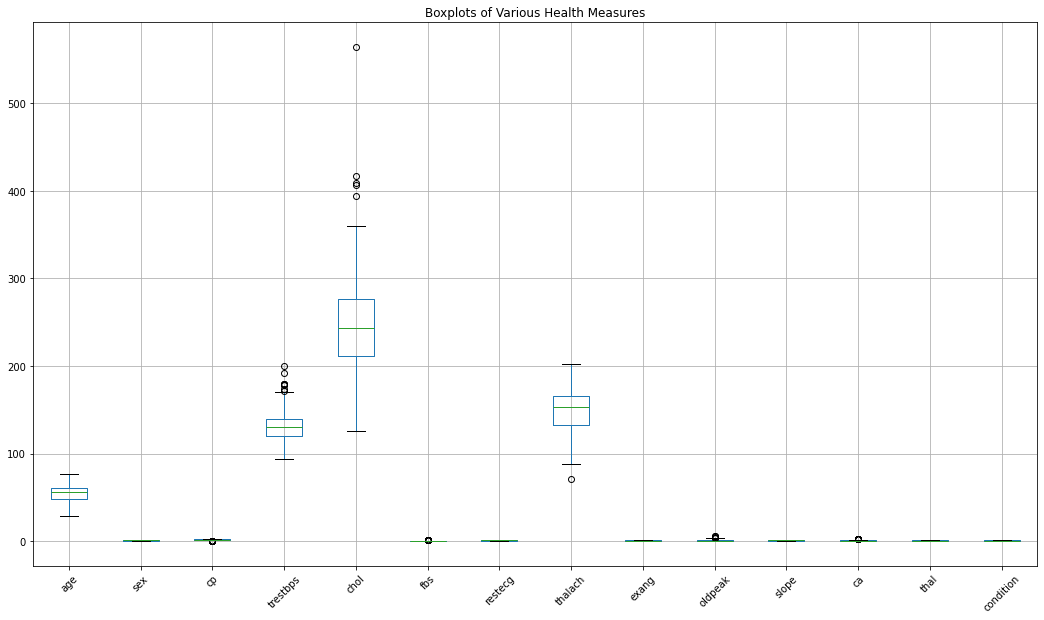

In [64]:
# Create boxplots
plt.figure(figsize=(18, 10))
df.boxplot()
plt.xticks(rotation=45)
plt.title('Boxplots of Various Health Measures')
plt.show()

In [65]:
# Split data into features and target
X = df.drop(columns=['condition'])
y = df['condition']

In [72]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Standardize the data
standard_scaler = StandardScaler()
standardised_data = standard_scaler.fit_transform(X)
X_std = pd.DataFrame(standardised_data, columns=X.columns)

In [73]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Separate features and target
X = df.drop(columns=['target'])
y = df['target']

# Define column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'trestbps', 'chol']),
        ('cat', OneHotEncoder(), ['sex','cp'])
    ])

# Create a pipeline with the preprocessor and a regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Print some predictions
print("Predictions:", y_pred[:5])

# Create boxplots of the numerical columns
numerical_cols = ['age', 'trestbps', 'chol']
X_scaled = pd.DataFrame(preprocessor.transform(X), columns=numerical_cols + ['sex_0', 'sex_1'])

plt.figure(figsize=(18, 10))
X_scaled[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Standardized Boxplots of Numerical Health Measures')
plt.show()

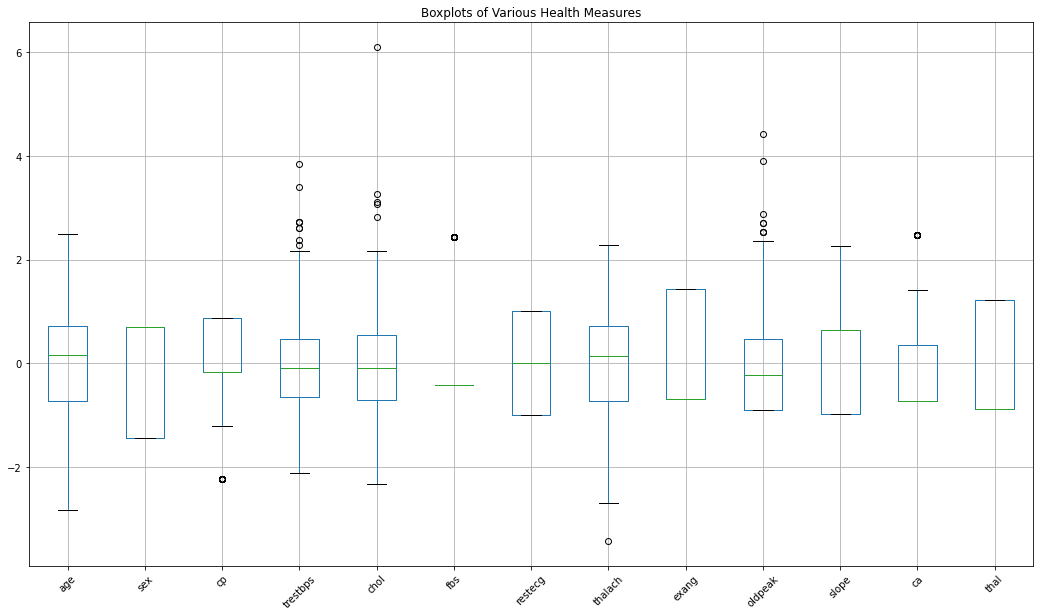

In [70]:
# Create boxplots
plt.figure(figsize=(18, 10))
X_std.boxplot()
plt.xticks(rotation=45)
plt.title('Boxplots of Various Health Measures')
plt.show()

In [65]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality 
# If cardinality is high(>10) don't use OneHotEncoder, instead use Ordinal Encoding or Label Encoding
low_cardinality_cols = [name for name in X_train.columns if X_train[name].nunique() < 10 and X_train[name].dtype == 'object']
print(low_cardinality_cols)

['sex', 'fbs', 'restecg', 'exang']


## Data Cleaning 

- Assigning correct Data Types for the columns
- Differ categorical columns from numerical columns  
* categorical_features = [sex, cp, fbs, restecg, exang, slope, thal]  
* numeric_features = [age, trestbps, chol,thalach, oldpeak, ca]

- Scale features?
- Check distributions and outliers? 

In [ ]:
# separate target from predictors
y = X_all.target
X = X_all.drop(['target'], axis=1)

In [ ]:
# assign object dtype to the categorical variables 
X['sex'] = X['sex'].astype('object')
#X['cp'] = X['cp'].astype('object')
X['fbs'] = X['fbs'].astype('object')
X['restecg'] = X['restecg'].astype('object')
X['exang'] = X['exang'].astype('object')
#X['slope'] = X['slope'].astype('object')

In [ ]:
# change the values of the categorical columns so that when we hot-encode interpretation will be easier
X['sex'][X['sex'] == 0] = 'female'
X['sex'][X['sex'] == 1] = 'male'

X['fbs'][X['fbs'] == 0] = 'lower than 120mg/ml'
X['fbs'][X['fbs'] == 1] = 'greater than 120mg/ml'

X['restecg'][X['restecg'] == 0] = 'normal'
X['restecg'][X['restecg'] == 1] = 'ST-T wave abnormality'
X['restecg'][X['restecg'] == 2] = 'left ventricular hypertrophy'

X['exang'][X['exang'] == 0] = 'no'
X['exang'][X['exang'] == 1] = 'yes'

#X['thal'][X['thal'] == 1] = 'normal'
#X['thal'][X['thal'] == 2] = 'fixed defect'
#X['thal'][X['thal'] == 3] = 'reversable defect'

/var/folders/78/tb8vhpxs04n4jdrq2_c1_0580000gn/T/ipykernel_55398/3346560605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'][X['sex'] == 0] = 'female'
/var/folders/78/tb8vhpxs04n4jdrq2_c1_0580000gn/T/ipykernel_55398/3346560605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'][X['sex'] == 1] = 'male'
/var/folders/78/tb8vhpxs04n4jdrq2_c1_0580000gn/T/ipykernel_55398/3346560605.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

## One Hot Encoding using pd.get_dummies approach  

pd.get_dummies()  
Convert categorical variable into dummy/indicator variables.

In [66]:
# checking if there is different column features in validation data with respect to training data
differ = set(X_valid.columns) - set(X_train.columns) 
differ

set()

In [67]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Saving the columns in a list
cols = X_train_encoded.columns.tolist()

In [68]:
X_train_encoded.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_male,fbs_lower than 120mg/ml,restecg_left ventricular hypertrophy,restecg_normal,exang_yes
237,60,140,293,170,1.2,2,1,1,0,1,0
106,69,160,234,131,0.1,1,1,0,0,1,0
10,54,140,239,160,1.2,0,1,1,0,0,0
153,66,146,278,152,0.0,1,0,1,0,1,0
77,59,140,221,164,0.0,0,1,1,0,0,1


In [69]:
#Now, we’ll encode the validation set followed by realigning the training and valid columns
#and filling in all missing values with zero.

In [71]:
X_valid_encoded = pd.get_dummies(X_valid, drop_first=True)

In [72]:
X_valid_encoded.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_male,fbs_lower than 120mg/ml,restecg_normal,exang_yes
99,53,130,246,173,0.0,3,1,0,1,0
296,63,124,197,136,0.0,0,0,1,0,1
89,58,100,248,122,1.0,0,0,1,1,0
30,41,105,198,168,0.0,1,0,1,0,0
234,70,130,322,109,2.4,3,1,1,1,0


In [73]:
# Making sure that X_valid_encoded has the same columns as X_train_encoded
X_valid_encoded = X_valid_encoded.reindex(columns=cols).fillna(0)

In [75]:
X_valid_encoded.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_male,fbs_lower than 120mg/ml,restecg_left ventricular hypertrophy,restecg_normal,exang_yes
99,53,130,246,173,0.0,3,1,0,0.0,1,0
296,63,124,197,136,0.0,0,0,1,0.0,0,1
89,58,100,248,122,1.0,0,0,1,0.0,1,0
30,41,105,198,168,0.0,1,0,1,0.0,0,0
234,70,130,322,109,2.4,3,1,1,0.0,1,0


In [78]:
X_train_encoded['restecg_left ventricular hypertrophy'].value_counts()

0    238
1      4
Name: restecg_left ventricular hypertrophy, dtype: int64

In [79]:
X_train_encoded.shape

(242, 11)

In [80]:
X_valid_encoded.shape

(61, 11)

In [143]:
#with the join='left' statement we keep only the columns that X_train has!
#df_X_train, df_X_valid = df_X_train.align(df_X_valid, join='left', axis=1, fill_value=0)

# Next Steps
Check if label(target column) is balanced  
If there is imbalance cant use accuracy to evaluate model(.score() returns the mean accuracy on the given test data and labels.)  
Look at the confusion matrix and the do the f1 score

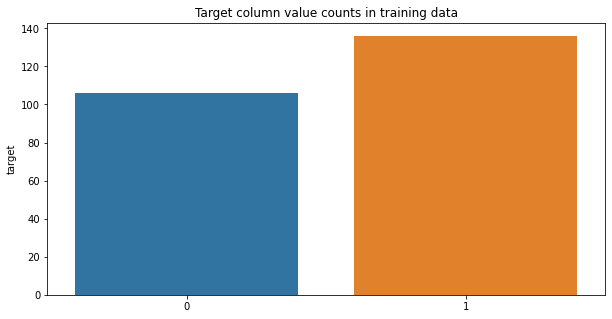

In [85]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot( x=y_train.value_counts().index, y=y_train.value_counts()).set(title='Target column value counts in training data')

## The Model

In [96]:
X_valid_encoded

,age,trestbps,chol,thalach,oldpeak,ca,sex_male,fbs_lower than 120mg/ml,restecg_left ventricular hypertrophy,restecg_normal,exang_yes
99,53,130,246,173,0.0,3,1,0,0.0,1,0
296,63,124,197,136,0.0,0,0,1,0.0,0,1
89,58,100,248,122,1.0,0,0,1,0.0,1,0
30,41,105,198,168,0.0,1,0,1,0.0,0,0
234,70,130,322,109,2.4,3,1,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
173,58,132,224,173,3.2,2,1,1,0.0,1,0
94,45,112,160,138,0.0,0,0,1,0.0,0,0
161,55,132,342,166,1.2,0,0,1,0.0,0,0
216,62,130,263,97,1.2,1,0,1,0.0,0,0


In [97]:
X_valid_encoded.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_male,fbs_lower than 120mg/ml,restecg_left ventricular hypertrophy,restecg_normal,exang_yes
99,53,130,246,173,0.0,3,1,0,0.0,1,0
296,63,124,197,136,0.0,0,0,1,0.0,0,1
89,58,100,248,122,1.0,0,0,1,0.0,1,0
30,41,105,198,168,0.0,1,0,1,0.0,0,0
234,70,130,322,109,2.4,3,1,1,0.0,1,0


In [112]:
# Function for comparing different approaches
# CANT USE MAE FOR THIS,we use accuracy
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

def score_dataset(X_train, X_valid, y_train, y_valid):
    estimators = [5, 10, 20, 30, 50, 80, 100, 120]
    scores_list = []
    for i in estimators:
        model = RandomForestClassifier(n_estimators=i, max_depth=5, random_state=2)
        model.fit(X_train_encoded, y_train)
        preds = model.predict(X_valid_encoded)
        scores_list.append(accuracy_score(y_valid, preds))
    return scores_list

In [113]:
print(score_dataset(X_train_encoded, X_valid_encoded, y_train, y_valid))

[0.8360655737704918, 0.8688524590163934, 0.819672131147541, 0.8032786885245902, 0.8524590163934426, 0.8524590163934426, 0.8360655737704918, 0.8360655737704918]


In [115]:
model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=2)
model.fit(X_train_encoded, y_train)
preds = model.predict(X_valid_encoded)
accuracy_score(y_valid, preds)

0.8688524590163934

### Image to help understand the classification Metrics
<img src="https://www.researchgate.net/profile/Junhua-Ding/publication/318432363/figure/fig3/AS:667604972761097@1536180837464/Visualizing-bias-and-variance-tradeoff-using-a-bulls-eye-diagram.ppm" width="400" height="400" />
Data Quality Considerations for Big Data and Machine Learning: Going Beyond Data Cleaning and Transformations - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Visualizing-bias-and-variance-tradeoff-using-a-bulls-eye-diagram_fig3_318432363 [accessed 27 Jan, 2022]

In [119]:
print("Confusion Matrix: ")
confusion_matrix = confusion_matrix(y_valid, preds)
confusion_matrix

Confusion Matrix: 


array([[26,  6],
       [ 2, 27]])

In [120]:
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.82      0.93      0.87        29

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [122]:
sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9285714285714286
Specificity :  0.8181818181818182


# Issues with the Data :

- I noticed that the chest pain (cp) values in the dataset don't match the values used when categorical values are replaced.
- The distinct chest pain (cp) values in the dataset are: 0, 1, 2 and 3. 
- ca - unique values are [0, 1, 2, 3, 4] (description says 0-3)
- thal - unique values are [0, 1, 2, 3] (description says [3, 6, 7])


#### from kaggle comments !  

The visualization is indeed very nice, but let me criticise you on stats and drawing conclusions. Researching so many features on a data set of 300 people will almost certainly lead to some fluke outcomes, so one must be very careful with conclusions.

For example, if you look closely at the age factor, there are very few young people, and they indeed have higher rates of disease. This clearly contradicts common sense and is most likely due to selection bias in the study. I would drop the age alltogether from any model.

There are few other candidates to drop. I mean, your decision tree is of depth 5, so you have 2^5 = 32 roots, and only 300 cases (around 240 for training). It is too easy to overfit. My guess is that getting your specificity rate will be possible by including only 3,4 variables in the model.



